# Telco customer churn

The *Telco customer churn* dataset is a large collection of data that provides detailed informations about customers of a fictional telecom enterprise. In this dataset, we'll be analysing and predicting the customer churn. This can be a great problem for the company, since a high customer churn may indicate that some clients are migrating to other companies.   

### 1. Preparing the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
!head data/df_train.csv

CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.24902,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3964
3038-PQIUY,1,United States,California,Dulzura,91917,"32.622999, -116.687855",32.622999,-116.687855,Female,No,No,No,38,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.4,No,4933
1468-DEFNC,1,United States,California,San Jose,95130,"37.277592, -121.986477",37.277592,-121.986477,Male,Yes,Yes,Yes,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service

There are two datasets that will be loaded:

- `df_train`: That will be used to make exploratory analysis and training
- `df_test`: That has the test data that will be used to generate prediction that will be submitted to Kaggle

In [3]:
# getting the train and test datasets
df_train = pd.read_csv('data/df_train.csv')
df_test = pd.read_csv('data/df_test.csv')

In [4]:
df_train.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3964
1,3038-PQIUY,1,United States,California,Dulzura,91917,"32.622999, -116.687855",32.622999,-116.687855,Female,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.4,No,4933
2,1468-DEFNC,1,United States,California,San Jose,95130,"37.277592, -121.986477",37.277592,-121.986477,Male,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.40,1548.65,No,4772
3,6437-UDQJM,1,United States,California,Los Angeles,90023,"34.017697, -118.200577",34.017697,-118.200577,Female,...,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,6129.65,No,4999
4,9490-DFPMD,1,United States,California,Tahoma,96142,"39.061227, -120.179546",39.061227,-120.179546,Female,...,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes,4871


In [5]:
df_test.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
0,2189-WWOEW,1,United States,California,Keene,93531,"35.214982, -118.59049",35.214982,-118.590490,Female,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.9,1269.55,3579
1,2446-ZKVAF,1,United States,California,Stockton,95207,"38.002125, -121.324979",38.002125,-121.324979,Male,...,No,No,No,No,Month-to-month,No,Credit card (automatic),56.8,1074.65,5558
2,4986-MXSFP,1,United States,California,San Leandro,94579,"37.687264, -122.15728",37.687264,-122.157280,Female,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.0,40.90,2237
3,5868-YWPDW,1,United States,California,Sherman Oaks,91423,"34.146957, -118.432138",34.146957,-118.432138,Male,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.2,519.15,5834
4,9412-GHEEC,1,United States,California,Murrieta,92563,"33.581045, -117.14719",33.581045,-117.147190,Male,...,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),104.8,4131.95,3492


### 2. Exploratory Analysis

### 2.1 Data Pre-processing

The first thing that can be noted is that there are some features with a single value, such as `Country` and `State` features.  

In [6]:
# get columns with unique values
distinct_values_train_count = df_train.nunique()
distinct_values_test_count = df_test.nunique()

print("train data:")
for col in distinct_values_train_count.index:
    if distinct_values_train_count[col] == 1:
        print(col)
print("----------------------")

print("test data:")
for col in distinct_values_train_count.index:
    if distinct_values_train_count[col] == 1:
        print(col)
print("----------------------")

train data:
Count
Country
State
----------------------
test data:
Count
Country
State
----------------------


Since these columns won't impact the models, we'll just drop them. There are also other columns that don't have relevant information for this analysis, as `CostumerID` and `Zip Code`, and don't impact de models either. 

The Geospatial data can be dropped, since we won't be using it for this analysis.
<!-- The `Latitude` and `Longitude` columns can be dropped because this information is already present in the `Lat Long` column   -->

In [7]:
# dropping single-value columns
unused_cols = ['Count', 'Country', 'State', 'CustomerID', 'Zip Code', 'Lat Long']

df_train.drop(columns=unused_cols, inplace=True)
customers_id = df_test['CustomerID']
df_test.drop(columns=unused_cols, inplace=True)


The next step is to look for missing values

In [8]:
def count_missing_values(df):
    missing_values_count = df.isnull().sum()

    total_cells = np.prod(df.shape)
    total_missing = missing_values_count.sum()

    # percent of data that is missing
    percent_missing = (total_missing/total_cells) * 100
    print(percent_missing)

In [9]:
count_missing_values(df_train)
count_missing_values(df_test)

0.0
0.0


In [10]:
# dropping duplicates
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [11]:
# checking the data types
df_train.dtypes

City                  object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
CLTV                   int64
dtype: object

In [12]:
df_test.dtypes

City                  object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
CLTV                   int64
dtype: object

Some numerical columns need to be converted to `int64` or `float64`

In [13]:
def convert_int_to_float(df, cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(inplace=True)

    return df

In [14]:
train_cols_to_convert = ['Monthly Charges', 'Total Charges', 'CLTV']
df_train = convert_int_to_float(df_train, train_cols_to_convert)

test_cols_to_convert = ['Monthly Charges', 'CLTV']
df_test = convert_int_to_float(df_test, test_cols_to_convert)

### 2.2 Exploratory Data Analysis

In this part, we'll be looking into the distribution of the data and get some insights from the dataset. After that, we'll be answering questions about the data 

##### City

In [15]:
df_train['City'].value_counts()

City
Los Angeles      269
San Diego        130
San Jose          94
San Francisco     91
Sacramento        90
                ... 
Leggett            1
Jamestown          1
Crockett           1
Squaw Valley       1
Santa Clarita      1
Name: count, Length: 1129, dtype: int64

For the sake of simplicity, we will be grouping cities with <20 clients in a single category, called "Others".

 <!-- We will also be considering this simplification for the test dataset, since the fact that some cities have a few clients may impact in the generalization capacity of the models.  -->

In [16]:
def group_cities(df):
    # Get the cities with less than 20 clients
    value_counts = df['City'].value_counts()
    values_to_replace = value_counts[value_counts < 20].index
    df['City'] = df['City'].replace(values_to_replace, 'Others')

    return df

In [17]:
df_train = group_cities(df_train)

df_train['City'].value_counts()

City
Others            4719
Los Angeles        269
San Diego          130
San Jose            94
San Francisco       91
Sacramento          90
Fresno              58
Long Beach          52
Oakland             39
Stockton            36
Glendale            34
Bakersfield         31
Riverside           30
Whittier            28
Modesto             25
Anaheim             24
Berkeley            24
Irvine              24
Santa Barbara       24
Burbank             23
Pasadena            23
Inglewood           22
Santa Rosa          22
Santa Monica        22
San Bernardino      21
Chula Vista         20
Name: count, dtype: int64

In [18]:
# calculate the churn rate for each city
churn_by_city = df_train.loc[df_train['Churn Label'] == 'Yes', 'City'].value_counts() / df_train['City'].value_counts() * 100

churn_by_city

City
Anaheim           29.166667
Bakersfield        6.451613
Berkeley          29.166667
Burbank           26.086957
Chula Vista       25.000000
Fresno            25.862069
Glendale          32.352941
Inglewood         18.181818
Irvine            16.666667
Long Beach        25.000000
Los Angeles       30.111524
Modesto           48.000000
Oakland           30.769231
Others            25.980081
Pasadena          34.782609
Riverside         23.333333
Sacramento        24.444444
San Bernardino    38.095238
San Diego         30.000000
San Francisco     27.472527
San Jose          27.659574
Santa Barbara     37.500000
Santa Monica      18.181818
Santa Rosa        40.909091
Stockton          30.555556
Whittier          14.285714
Name: count, dtype: float64

In [19]:
churn_by_city.describe()

count    26.000000
mean     27.539082
std       8.677313
min       6.451613
25%      24.583333
50%      27.566051
75%      30.715812
max      48.000000
Name: count, dtype: float64

<Axes: title={'center': 'Churn rate by city'}, xlabel='City', ylabel='Churn rate (%)'>

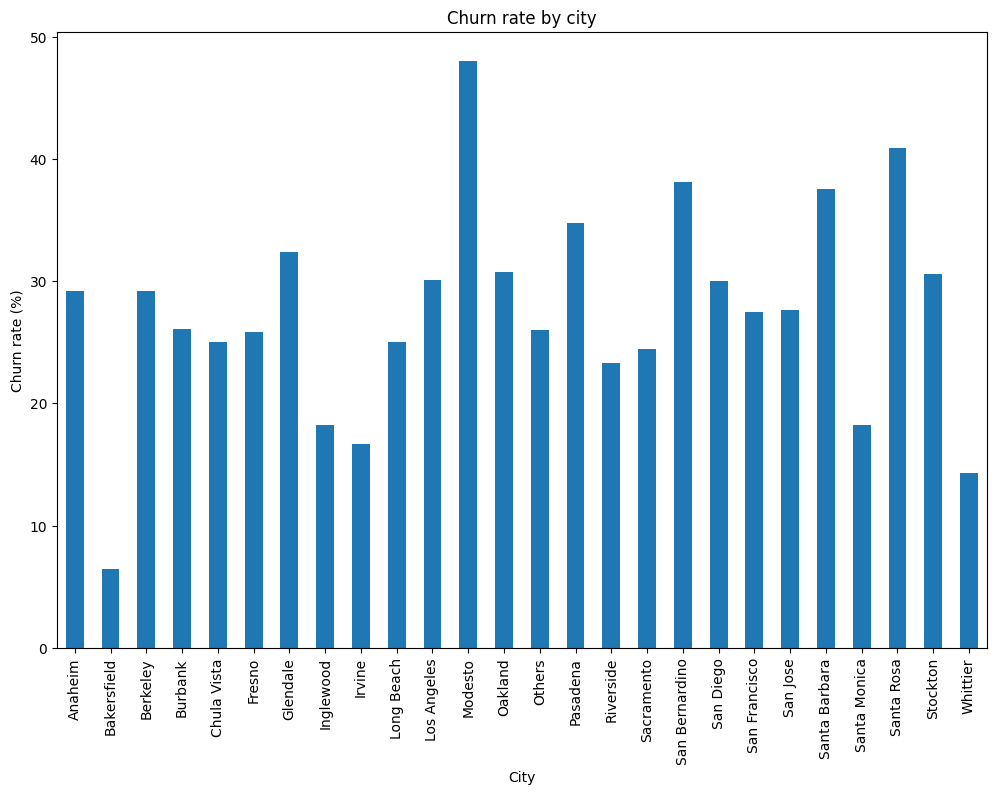

In [20]:
plt.figure(figsize=(12,8))
churn_by_city.plot(kind='bar', title='Churn rate by city', ylabel="Churn rate (%)")

**What is the city with the biggest churn rate?**

By looking at the graph, we can see that Modesto has the biggest churn rate, followed by Santa Rosa and San Bernadino. 

##### Ternure Months

**Is churn more prevalent among old or newer clients?** 

To answer this question, we will separate the clients by recent and old clients. Consider a client to be old if they have more than 12 ternure months.

In [21]:
old_clients = df_train[df_train['Tenure Months'] > 12]
new_clients = df_train[df_train['Tenure Months'] < 12]

# calculate churn rate
old_clients_churn_rate = old_clients[old_clients['Churn Label'] == 'Yes'].shape[0] / old_clients.shape[0] * 100
new_clients_churn_rate = new_clients[new_clients['Churn Label'] == 'Yes'].shape[0] / new_clients.shape[0] * 100

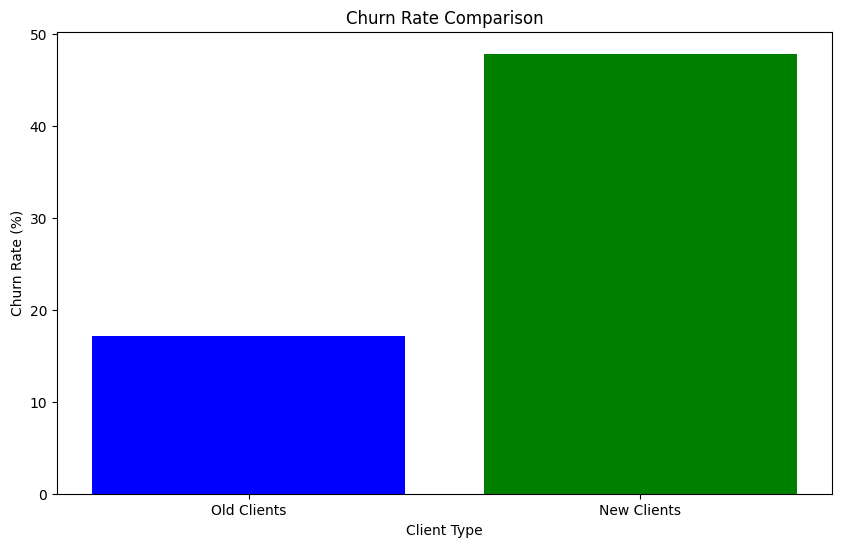

In [22]:
# data for histogram
churn_rates = [old_clients_churn_rate, new_clients_churn_rate]
labels = ['Old Clients', 'New Clients']

# plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, churn_rates, color=['blue', 'green'])
plt.xlabel('Client Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate Comparison')
plt.show()

#### Phone, Multiple Lines, Internet, Online Security, Online Backup and Device Protection services

**What are the less used services?**

In [23]:
# checking the values of each column
columns = [
    'Phone Service',
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Tech Support',
    'Device Protection',
    'Internet Service'
]

for column in columns:
    print(df_train[column].value_counts())
    print('-----------------------------------')


Phone Service
Yes    5392
No      583
Name: count, dtype: int64
-----------------------------------
Multiple Lines
No                  2889
Yes                 2503
No phone service     583
Name: count, dtype: int64
-----------------------------------
Online Security
No                     2971
Yes                    1692
No internet service    1312
Name: count, dtype: int64
-----------------------------------
Online Backup
No                     2623
Yes                    2040
No internet service    1312
Name: count, dtype: int64
-----------------------------------
Tech Support
No                     2924
Yes                    1739
No internet service    1312
Name: count, dtype: int64
-----------------------------------
Device Protection
No                     2611
Yes                    2052
No internet service    1312
Name: count, dtype: int64
-----------------------------------
Internet Service
Fiber optic    2608
DSL            2055
No             1312
Name: count, dtype: int64


In [24]:
# replacing negative values for just No in the train and test sets 
df_train.loc[df_train['Multiple Lines'] == "No phone service", 'Multiple Lines'] = "No"
df_train.loc[df_train['Online Security'] == "No internet service", 'Online Security'] = "No"
df_train.loc[df_train['Online Backup'] == "No internet service", 'Online Backup'] = "No"
df_train.loc[df_train['Device Protection'] == "No internet service", 'Device Protection'] = "No"


df_test.loc[df_test['Multiple Lines'] == "No phone service", 'Multiple Lines'] = "No"
df_test.loc[df_test['Online Security'] == "No internet service", 'Online Security'] = "No"
df_test.loc[df_test['Online Backup'] == "No internet service", 'Online Backup'] = "No"
df_test.loc[df_test['Device Protection'] == "No internet service", 'Device Protection'] = "No"

In [25]:
# get the distribution of the services
usage_stats = {}
for column in columns:
    usage = df_train.loc[df_train[column] != "No"].shape[0] / df_train[column].shape[0]
    usage_stats[column] = usage

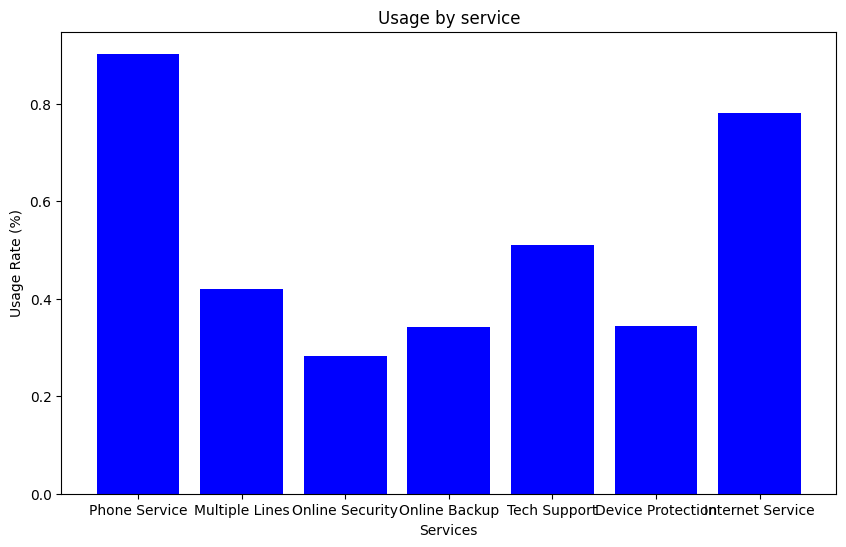

In [26]:
# plot the usage of each service
labels = columns
s_usage_stats = pd.Series(usage_stats)

# plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, s_usage_stats, color=['blue'])
plt.xlabel('Services')
plt.ylabel('Usage Rate (%)')
plt.title('Usage by service')
plt.show()

From the graph, we can see that the less used services are `Online Security`, `Online Backup` and `Device Protection`. One possible reason for this is that the clients do not think that they are essencial or they don't know that those services exist.

### 2.3 Encoding

In [27]:
df_train.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,Los Angeles,33.973616,-118.249020,Female,No,Yes,No,1,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3964
1,Others,32.622999,-116.687855,Female,No,No,No,38,Yes,Yes,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.40,No,4933
2,San Jose,37.277592,-121.986477,Male,Yes,Yes,Yes,64,Yes,Yes,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.40,1548.65,No,4772
3,Los Angeles,34.017697,-118.200577,Female,Yes,Yes,No,72,Yes,Yes,...,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,6129.65,No,4999
4,Others,39.061227,-120.179546,Female,Yes,No,No,42,Yes,Yes,...,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes,4871


In [28]:
df_test.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
0,Keene,35.214982,-118.590490,Female,No,No,No,15,Yes,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.9,1269.55,3579
1,Stockton,38.002125,-121.324979,Male,No,Yes,No,18,Yes,Yes,...,No,No,No,No,Month-to-month,No,Credit card (automatic),56.8,1074.65,5558
2,San Leandro,37.687264,-122.157280,Female,No,No,No,2,Yes,No,...,No,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.0,40.90,2237
3,Sherman Oaks,34.146957,-118.432138,Male,Yes,Yes,No,6,Yes,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.2,519.15,5834
4,Murrieta,33.581045,-117.147190,Male,No,No,No,40,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),104.8,4131.95,3492


This dataset has a bunch of boolean features that need to be encoded. But some of these features need to be treated before making the encoding.

In [29]:
df_train.loc[df_train['Tech Support'] == "No internet service", 'Tech Support'] = "No"
df_train.loc[df_train['Streaming TV'] == "No internet service", 'Streaming TV'] = "No"
df_train.loc[df_train['Streaming Movies'] == "No internet service", 'Streaming Movies'] = "No"

df_test.loc[df_test['Tech Support'] == "No internet service", 'Tech Support'] = "No"
df_test.loc[df_test['Streaming TV'] == "No internet service", 'Streaming TV'] = "No"
df_test.loc[df_test['Streaming Movies'] == "No internet service", 'Streaming Movies'] = "No"

In [30]:
# one-hot-encoding
def one_hot_encode(df, cols):
    for col in cols:
        df.loc[df[col] == 'No', col] = 0 
        df.loc[df[col] == 'Yes', col] = 1
        df[col] = df[col].astype(np.int16) 

    return df

In [31]:
to_encode_train = ['Senior Citizen', 'Partner', 'Dependents', 'Online Security', 'Multiple Lines', 'Phone Service', 'Paperless Billing',
            'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Churn Label']

to_encode_test = ['Senior Citizen', 'Partner', 'Dependents', 'Online Security', 'Multiple Lines', 'Phone Service', 'Paperless Billing',
            'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

df_train = one_hot_encode(df_train, to_encode_train)
df_test = one_hot_encode(df_test, to_encode_test)

In [32]:
df_train.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,Los Angeles,33.973616,-118.249020,Female,0,1,0,1,0,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,3964
1,Others,32.622999,-116.687855,Female,0,0,0,38,1,1,...,0,0,0,Month-to-month,1,Bank transfer (automatic),66.15,2522.40,0,4933
2,San Jose,37.277592,-121.986477,Male,1,1,1,64,1,1,...,0,0,0,Two year,1,Bank transfer (automatic),24.40,1548.65,0,4772
3,Los Angeles,34.017697,-118.200577,Female,1,1,0,72,1,1,...,0,1,1,Two year,1,Credit card (automatic),84.10,6129.65,0,4999
4,Others,39.061227,-120.179546,Female,1,0,0,42,1,1,...,0,1,0,Month-to-month,1,Electronic check,84.65,3541.35,1,4871


In [33]:
df_test.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
0,Keene,35.214982,-118.590490,Female,0,0,0,15,1,0,...,0,0,0,1,Month-to-month,1,Bank transfer (automatic),85.9,1269.55,3579
1,Stockton,38.002125,-121.324979,Male,0,1,0,18,1,1,...,0,0,0,0,Month-to-month,0,Credit card (automatic),56.8,1074.65,5558
2,San Leandro,37.687264,-122.157280,Female,0,0,0,2,1,0,...,0,0,0,0,Month-to-month,1,Mailed check,20.0,40.90,2237
3,Sherman Oaks,34.146957,-118.432138,Male,1,1,0,6,1,0,...,0,0,0,1,Month-to-month,1,Electronic check,84.2,519.15,5834
4,Murrieta,33.581045,-117.147190,Male,0,0,0,40,1,1,...,1,1,1,1,Month-to-month,0,Bank transfer (automatic),104.8,4131.95,3492


The next step is to encode the categorical columns

In [34]:
columns = [
    'City',
    'Internet Service',
    'Contract',
    'Gender'
]

for column in columns:
    print(df_train[column].value_counts())
    print("---------------------------------")



City
Others            4719
Los Angeles        269
San Diego          130
San Jose            94
San Francisco       91
Sacramento          90
Fresno              58
Long Beach          52
Oakland             39
Stockton            36
Glendale            34
Bakersfield         31
Riverside           30
Whittier            28
Modesto             25
Anaheim             24
Berkeley            24
Irvine              24
Santa Barbara       24
Burbank             23
Pasadena            23
Inglewood           22
Santa Rosa          22
Santa Monica        22
San Bernardino      21
Chula Vista         20
Name: count, dtype: int64
---------------------------------
Internet Service
Fiber optic    2608
DSL            2055
No             1312
Name: count, dtype: int64
---------------------------------
Contract
Month-to-month    3285
Two year          1437
One year          1253
Name: count, dtype: int64
---------------------------------
Gender
Male      3037
Female    2938
Name: count, dtype: int64

By looking at the count of different values in each categorical feature, we can use the One-Hot-Encoding technique for the `Payment Method`, `Gender`, `Internet Service` and `Contract` features, since they don't have many categories. For the `City` column, we'll use the Label Encoding.

In [35]:
df_train = pd.get_dummies(df_train, columns=['Payment Method', 'Internet Service', 'Contract'], dtype=np.int16)
df_test = pd.get_dummies(df_test, columns=['Payment Method', 'Internet Service', 'Contract'], dtype=np.int16)

In [36]:
def encode_gender(df):
    df.loc[df['Gender'] == 'Male', 'Gender'] = 1
    df.loc[df['Gender'] == 'Female', 'Gender'] = 0

    df['Gender'] = df['Gender'].astype(np.int16, copy=False)

    return df

In [37]:
df_train = encode_gender(df_train)
df_test = encode_gender(df_test)

In [38]:
# encoding the City column
def encode_city(df):
    encoder = LabelEncoder()

    df['City'] = encoder.fit_transform(df['City'])

    df['City'].value_counts()

    return df

In [39]:
df_train = encode_city(df_train)
df_test = encode_city(df_test)

In [40]:
df_train.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,10,33.973616,-118.249020,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,13,32.622999,-116.687855,0,0,0,0,38,1,1,...,1,0,0,0,1,0,0,1,0,0
2,20,37.277592,-121.986477,1,1,1,1,64,1,1,...,1,0,0,0,0,0,1,0,0,1
3,10,34.017697,-118.200577,0,1,1,0,72,1,1,...,0,1,0,0,1,0,0,0,0,1
4,13,39.061227,-120.179546,0,1,0,0,42,1,1,...,0,0,1,0,0,1,0,1,0,0


In [41]:
df_test.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,263,35.214982,-118.590490,0,0,0,0,15,1,0,...,1,0,0,0,0,1,0,1,0,0
1,541,38.002125,-121.324979,1,0,1,0,18,1,1,...,0,1,0,0,1,0,0,1,0,0
2,485,37.687264,-122.157280,0,0,0,0,2,1,0,...,0,0,0,1,0,0,1,1,0,0
3,518,34.146957,-118.432138,1,1,1,0,6,1,0,...,0,0,1,0,0,1,0,1,0,0
4,368,33.581045,-117.147190,1,0,0,0,40,1,1,...,1,0,0,0,0,1,0,1,0,0


In [42]:
df_train.dtypes

City                                          int64
Latitude                                    float64
Longitude                                   float64
Gender                                        int16
Senior Citizen                                int16
Partner                                       int16
Dependents                                    int16
Tenure Months                                 int64
Phone Service                                 int16
Multiple Lines                                int16
Online Security                               int16
Online Backup                                 int16
Device Protection                             int16
Tech Support                                  int16
Streaming TV                                  int16
Streaming Movies                              int16
Paperless Billing                             int16
Monthly Charges                             float64
Total Charges                               float64
Churn Label 

In [43]:
df_test.dtypes

City                                          int64
Latitude                                    float64
Longitude                                   float64
Gender                                        int16
Senior Citizen                                int16
Partner                                       int16
Dependents                                    int16
Tenure Months                                 int64
Phone Service                                 int16
Multiple Lines                                int16
Online Security                               int16
Online Backup                                 int16
Device Protection                             int16
Tech Support                                  int16
Streaming TV                                  int16
Streaming Movies                              int16
Paperless Billing                             int16
Monthly Charges                             float64
Total Charges                               float64
CLTV        

#### 3. Classification

In this section, we will be using the training set to train our model and make some predictions.

#### 3.1 Splitting the dataset

In [44]:
X = df_train.drop(labels=["Churn Label"], axis=1)
y = df_train['Churn Label'] 

In [45]:
from sklearn.model_selection import train_test_split

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
# import metrics
from sklearn.metrics import confusion_matrix, classification_report

#### 3.2 Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

# print metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# import precison metric
from sklearn.metrics import precision_score, f1_score, recall_score 


DTPrec = precision_score(y_pred,y_test)
print('Decision Tree precision is: {:.2f}%'.format(DTPrec*100))
DTPrec = recall_score(y_pred,y_test)
print('Decision Tree recall is: {:.2f}%'.format(DTPrec*100))
DTPrec = f1_score(y_pred,y_test)
print('Decision Tree f1-score is: {:.2f}%'.format(DTPrec*100))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       880
           1       0.49      0.50      0.50       315

    accuracy                           0.73      1195
   macro avg       0.66      0.66      0.66      1195
weighted avg       0.73      0.73      0.73      1195

[[716 164]
 [157 158]]
Decision Tree precision is: 50.16%
Decision Tree recall is: 49.07%
Decision Tree f1-score is: 49.61%


#### 3.3 Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# max_leaf_nodes=100

RFclassifier = RandomForestClassifier(max_leaf_nodes=100)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

# print metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import precision_score, f1_score, recall_score 


RFPrec = precision_score(y_pred,y_test)
print('Random Forest precision is: {:.2f}%'.format(RFPrec*100))
RFPrec = recall_score(y_pred,y_test)
print('Random Forest recall is: {:.2f}%'.format(RFPrec*100))
RFPrec = f1_score(y_pred,y_test)
print('Random Forest f1-score is: {:.2f}%'.format(RFPrec*100))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       880
           1       0.67      0.48      0.56       315

    accuracy                           0.80      1195
   macro avg       0.75      0.70      0.72      1195
weighted avg       0.79      0.80      0.79      1195

[[807  73]
 [164 151]]
Random Forest precision is: 47.94%
Random Forest recall is: 67.41%
Random Forest f1-score is: 56.03%


#### 3.4 Cross-Validation

Cross-validation is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data. Intuitively, we can say that it is a technique to check how a statistical model generalizes to an independent dataset.

Some of the most common cross-validation methods are as follows:

- **K-fold**: It divides the input dataset into K groups of samples of equal sizes. These samples are called folds. For each learning set, the prediction function uses k-1 folds, and the rest of the folds are used for the test set. This approach is a very popular CV approach because it is easy to understand, and the output is less biased than other methods.
- **Leave-P-out**: In this approach, the p datasets are left out of the training data. It means, if there are total n datapoints in the original input dataset, then n-p data points will be used as the training dataset and the p data points as the validation set. This complete process is repeated for all the samples, and the average error is calculated to know the effectiveness of the model.
- **Holdout method**: This method is the simplest cross-validation technique among all. In this method, we need to remove a subset of the training data and use it to get prediction results by training it on the rest part of the dataset.
- **Validation Set**: We divide our input dataset into a training set and test or validation set in the validation set approach. Both the subsets are given 50% of the dataset.


In this classification, we will be using the k-fold cross-validation, because it generally results in a less biased model. 

In [49]:
from sklearn.model_selection import cross_val_score

DTcv_scores = cross_val_score(DTclassifier, X, y, 
                            cv=5,
                            scoring='f1')

RFcv_scores = cross_val_score(DTclassifier, X, y, 
                            cv=5,
                            scoring='f1')

print("Decision Tree's cross-validation f1-score: %f" % DTcv_scores.mean())
print("Random Forest's cross-validation f1-score: %f" % RFcv_scores.mean())

Decision Tree's cross-validation f1-score: 0.495417
Random Forest's cross-validation f1-score: 0.509038


#### 4 Principal Component Analysis (PCA)

In this last step, we'll be applying dimensionality reduction techniques, such as PCA, in our data in order to check how the models will perform after that.

First, we need to standardize the data before we can apply PCA.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit on training set only, to avoid data leakage
scaler.fit(X_train)

# apply transform to both the training set and the test set
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

Now, we will use the PCA module from scikit-learn, wich performs Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

In [51]:
from sklearn.decomposition import PCA

# choosing 95% of variance to be capture by PCA
pca = PCA(.95)

# fit only on the train set to avoid data leakage
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

After applying PCA, we can make new predictions and compare the performance of the models with and without this technique.

In [52]:
DTclassifierPCA = DecisionTreeClassifier()
DTclassifierPCA.fit(X_train, y_train)

y_pred = DTclassifierPCA.predict(X_test)

# print metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# import accuracy metric
from sklearn.metrics import precision_score
DTPrec = precision_score(y_pred,y_test)
print('Decision Tree precision is: {:.2f}%'.format(DTPrec*100))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       880
           1       0.46      0.47      0.47       315

    accuracy                           0.72      1195
   macro avg       0.64      0.64      0.64      1195
weighted avg       0.72      0.72      0.72      1195

[[709 171]
 [167 148]]
Decision Tree precision is: 46.98%


In [53]:
RFclassifierPCA = RandomForestClassifier()
RFclassifierPCA.fit(X_train, y_train)

y_pred = RFclassifierPCA.predict(X_test)

# print metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# accuracy
from sklearn.metrics import precision_score
RFPrec = precision_score(y_pred,y_test)
print('Random Forest precision is: {:.2f}%'.format(RFPrec*100))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       880
           1       0.65      0.47      0.55       315

    accuracy                           0.79      1195
   macro avg       0.74      0.69      0.71      1195
weighted avg       0.78      0.79      0.78      1195

[[800  80]
 [167 148]]
Random Forest precision is: 46.98%


As expected, the application of PCA had the side-effect of reducing the precision of our models, although other metrics have had a slightly variation

#### 5. Output

The last step will make output results in csv file.

In [54]:
y_pred = RFclassifier.predict(df_test)

y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int16)

In [55]:
submision = pd.DataFrame({'CustomerID': customers_id, 'Churn Label': pd.Series(y_pred).map({1: 'Yes', 0: 'No'})}) 
submision.to_csv('predictions.csv', index=False)

#### 6. References

Dataset documentation:
- https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

Articles:
- https://www.datacamp.com/blog/classification-machine-learning
- https://www.javatpoint.com/cross-validation-in-machine-learning
- https://builtin.com/machine-learning/pca-in-python
- https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Documentation:
- https://scikit-learn.org/stable/index.html
- https://pandas.pydata.org/docs/

Kaggle Courses:
- https://www.kaggle.com/learn/intermediate-machine-learning
- https://www.kaggle.com/learn/intro-to-machine-learning

Kaggle Notebooks:
- https://www.kaggle.com/code/caesarmario/drug-classification-w-various-ml-models
- https://www.kaggle.com/code/allanbruno/helping-regular-people-price-listings-on-airbnb